In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns',30)

In [2]:
df=pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

In [4]:
df.shape


(400, 26)

In [5]:
df.dtypes


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
df.id

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet  \
0    121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   
1      NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   
2    423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   
3    117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor   
4    106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   
..     ...   ...  ...    ...  ...   ...  ..   ...  ...  ...  ...  ..   ...   
395  140.0  49.0  0.5  150.0  4.9  15.7  47  6700  4.9   no   no  no  good   
396   75.0  31.0  1.2  141.0  3.5  16.5  54  7800  6.2   no   no  no  good   
397  100.0  26.0  0.6  137.0  4.4  15.8  49  6600  5.4   no   no  no  good   
398  114.0  50.0  1.0  135.0  4.9  14.2  51  7200  5.9   no   no  no  good   
399  131.0  18.0  1.1  141.0  3.5  15.8  53  6800  6.1   no   no  no  good   

      pe  ane classification  
0     no   no            ckd  
1     no   no            ckd  
2     no  yes            ckd  
3    yes  yes            ckd  
4     no   no            ckd  
..   ...  ...            ...  
395   no   no         notckd  
396   no   no         notckd  
397   no   no         notckd  
398   no   no         notckd  
399   no   no         notckd  

[400 rows x 25 columns]

In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume,errors='coerce')

In [13]:
df['packed_cell_volume']


0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [14]:
df['white_blood_cell_count'] = pd.to_numeric(df.white_blood_cell_count,errors='coerce')

In [15]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [16]:
df['red_blood_cell_count'] = pd.to_numeric(df.red_blood_cell_count,errors='coerce')

In [17]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

In [18]:
df['white_blood_cell_count']=df["white_blood_cell_count"].astype(int, errors="ignore")

In [19]:
df['white_blood_cell_count']#as thre is missing column thats why its is not converting to  int

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [20]:
cat_cols=[col for col in df.columns if df[col].dtype == 'object']
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [21]:
num_cols=[col for col in df.columns if df[col].dtype != 'object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [22]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}  values. \n")

red_blood_cells has [nan 'normal' 'abnormal']  values. 

pus_cell has ['normal' 'abnormal' nan]  values. 

pus_cell_clumps has ['notpresent' 'present' nan]  values. 

bacteria has ['notpresent' 'present' nan]  values. 

hypertension has ['yes' 'no' nan]  values. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]  values. 

coronary_artery_disease has ['no' 'yes' '\tno' nan]  values. 

appetite has ['good' 'poor' nan]  values. 

peda_edema has ['no' 'yes' nan]  values. 

aanemia has ['no' 'yes' nan]  values. 

class has ['ckd' 'ckd\t' 'notckd']  values. 



In [23]:
df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

In [24]:
df['coronary_artery_disease'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

In [25]:
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)


In [26]:
df['class']=df['class'].map({'ckd':0,'notckd':1})
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [28]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [29]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [ ]:
df.isna().sum()

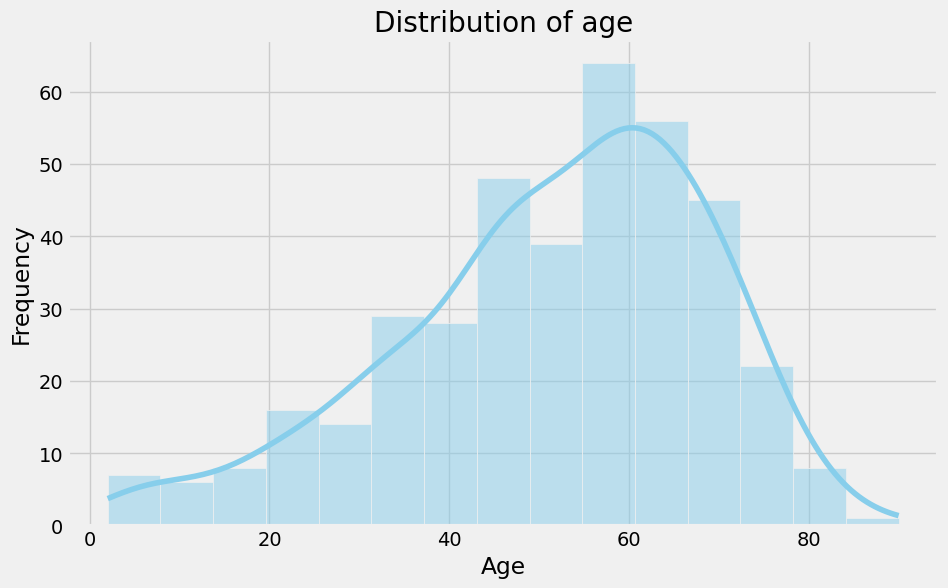

In [34]:
#univariate analysis
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(),kde=True,color='skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#insights
#the mean is  around 50
#most of the people  are around 40-60
#70-80 ha s low number of people

In [35]:
#how many people have cronic dieaee has hypertension
df['hypertension']

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

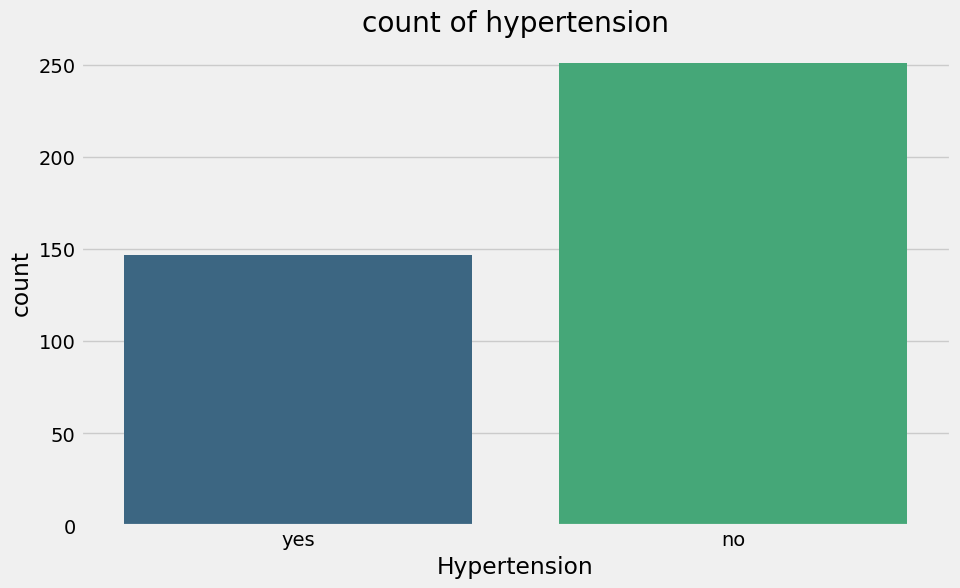

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='hypertension',data=df,palette='viridis')
plt.title('count of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('count')
plt.show()
#150 person ha scronic diease

In [40]:
df_temp= df[df['class'] == 0]
df_temp['hypertension'].value_counts()
# 147 people has chronic diease and hypertension


hypertension
yes    147
no     103
Name: count, dtype: int64

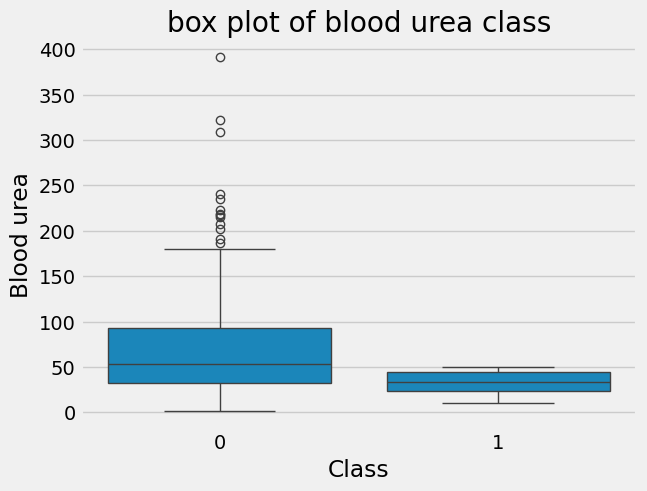

In [42]:
plt.figure(figure=(10,6))
sns.boxplot(x='class',y='blood_urea',data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title("box plot of blood urea by  class")
plt.show()
#visualizing the outlier

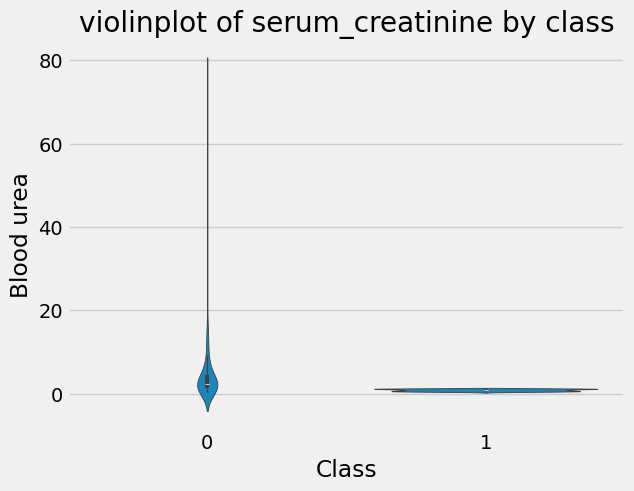

In [85]:
plt.figure(figure=(10,6))
sns.violinplot(x='class',y='serum_creatinine',data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title("violinplot of serum_creatinine by class")
plt.show()
#visualizing the outlier

<Axes: xlabel='aanemia', ylabel='count'>

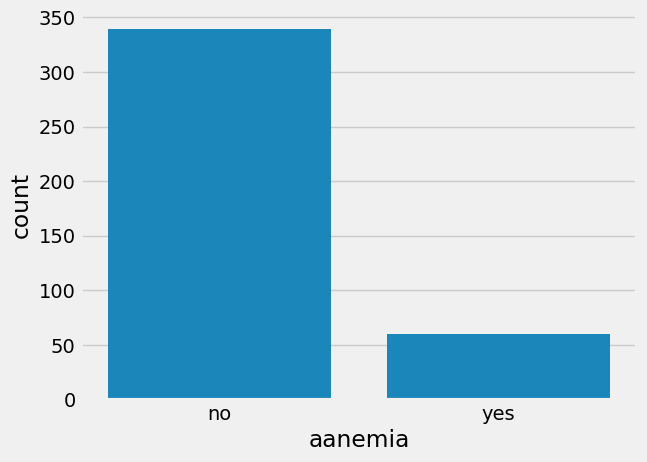

In [46]:
sns.countplot(x="aanemia",data)

In [47]:
df.appetite

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

<Axes: ylabel='count'>

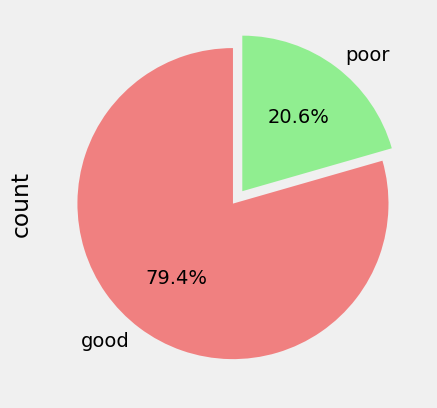

In [50]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)
#79.4% people has good appetite


<Axes: ylabel='count'>

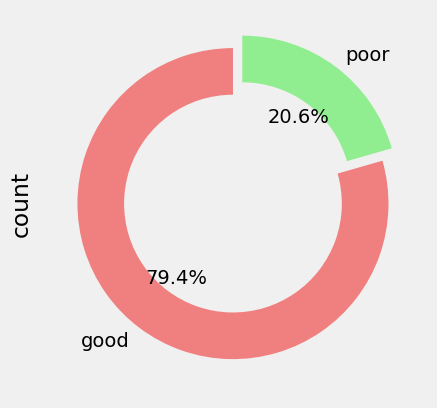

In [51]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90,wedgeprops=dict(width=0.3))
#79.4% people has good appetite


In [ ]:

#how many people having cronic diease and hypertention with poor appetite ?


<Axes: xlabel='peda_edema', ylabel='count'>

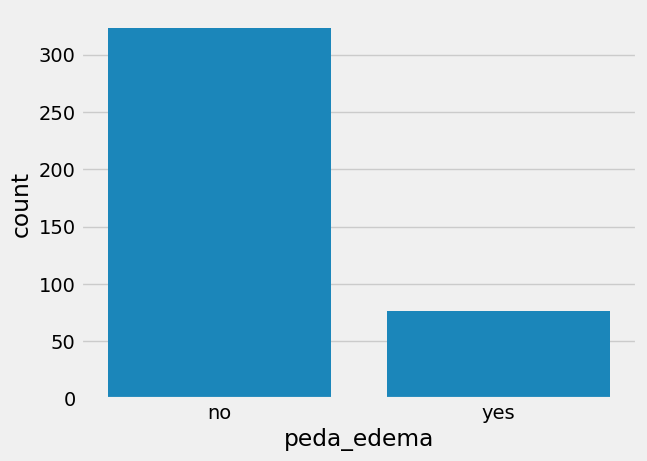

In [54]:
sns.countplot(x='peda_edema',data=df)

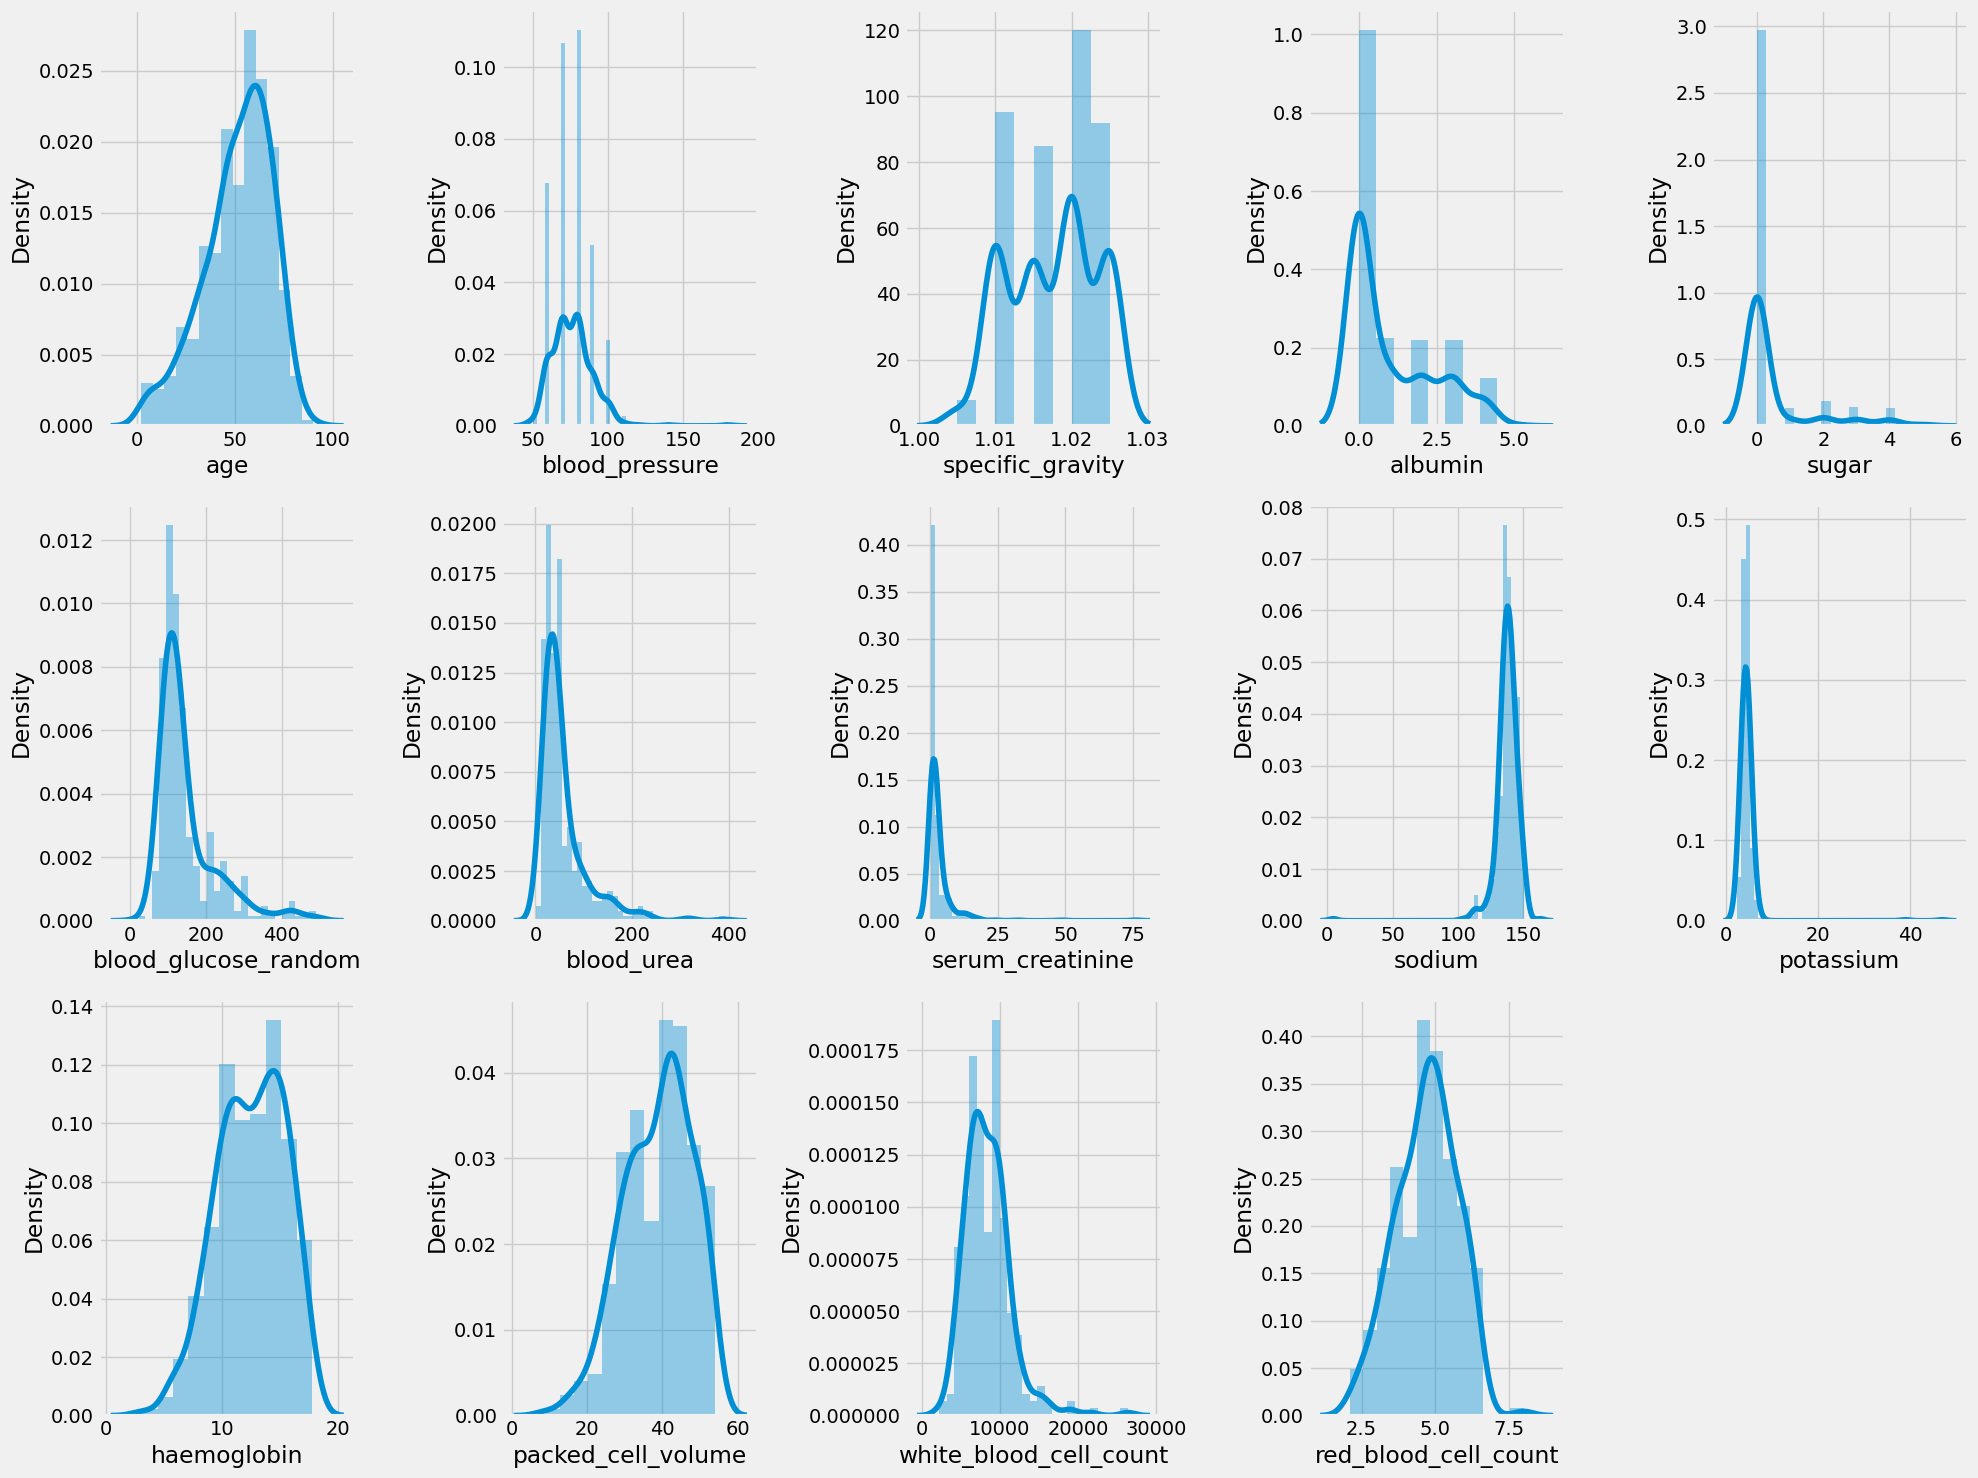

In [60]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [71]:
def kde(col) :
     grid=sns.FacetGrid(df,hue="class",height=6,aspect=2)
     grid.map(sns.kdeplot,col)
     grid.add_legend()

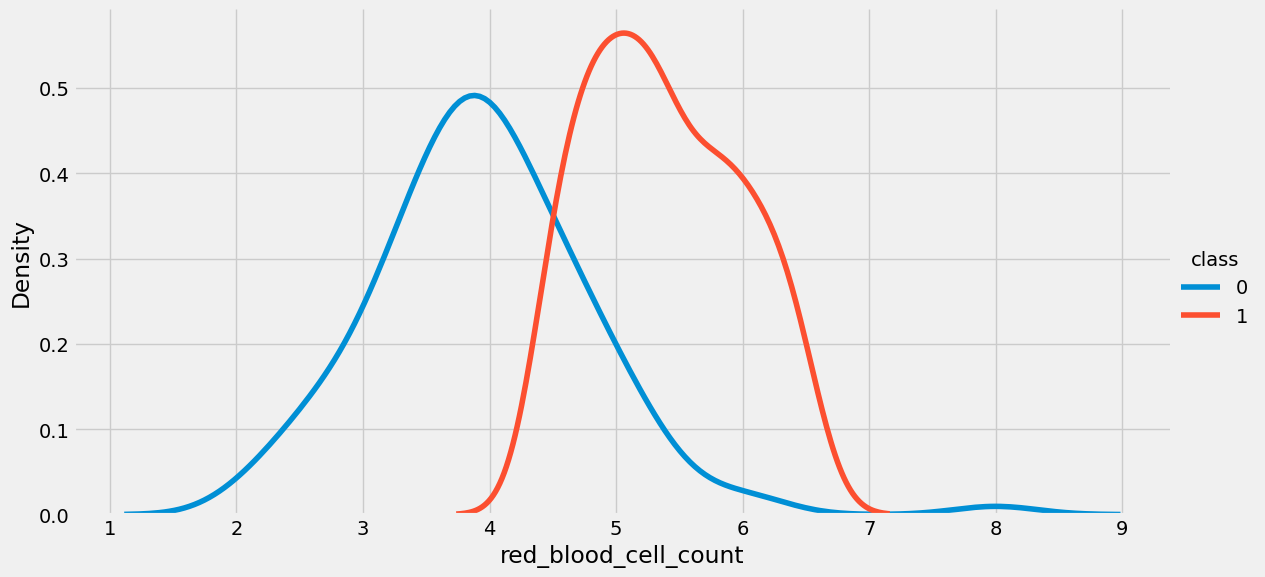

In [72]:
kde('red_blood_cell_count')

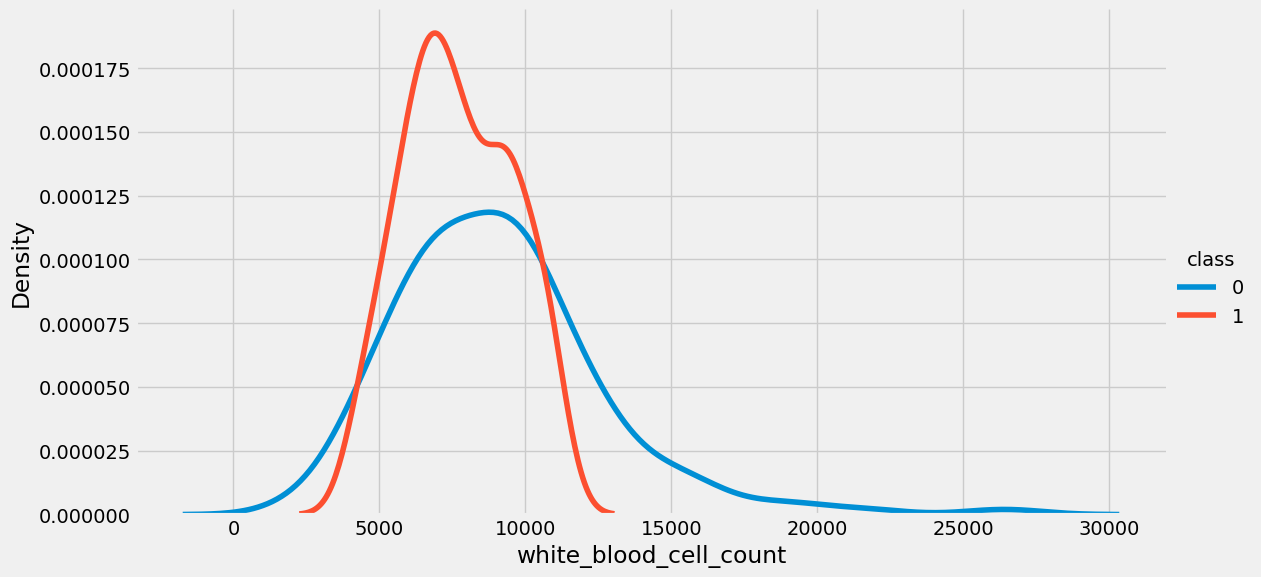

In [73]:
kde('white_blood_cell_count')

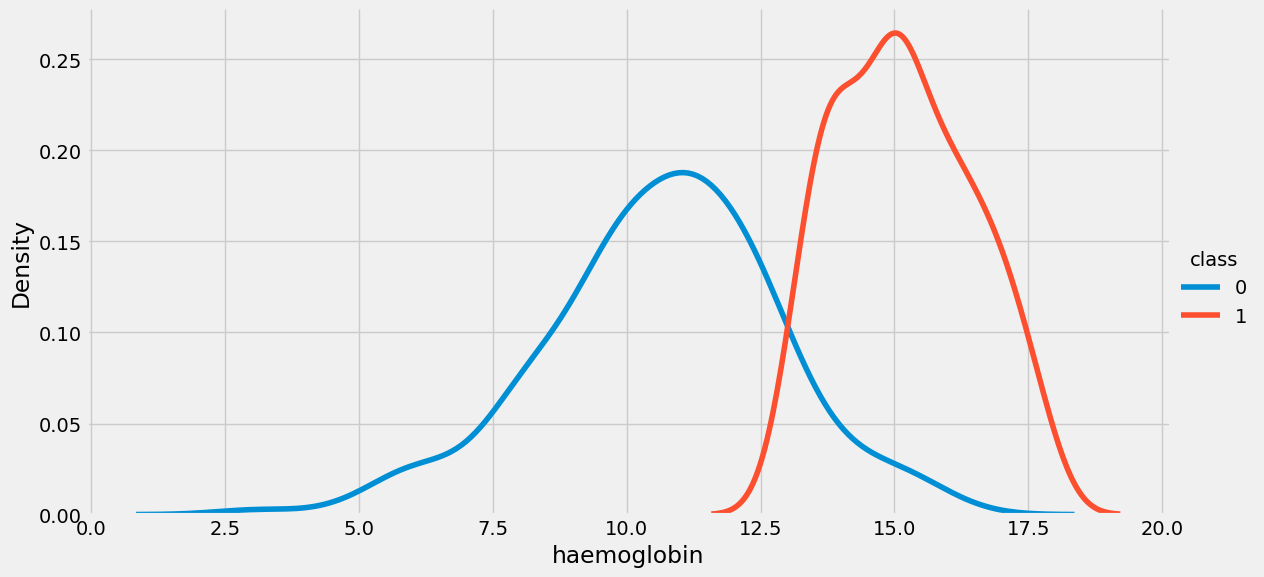

In [74]:
kde('haemoglobin')

In [80]:
#1
def violin(col):
    fig = px.violin(df,y=col,x='class',box=True,template='plotly_dark')
    return fig.show()
    #px->ploty.express

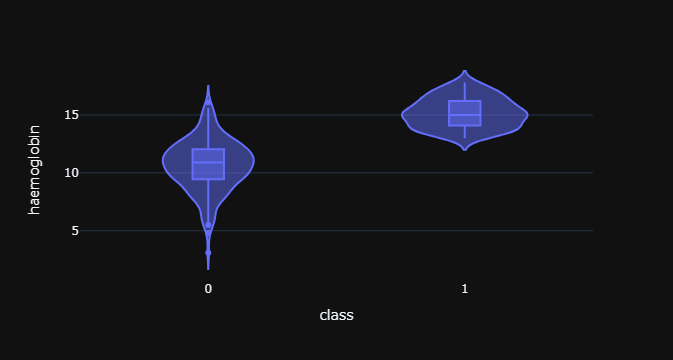

In [81]:
violin('haemoglobin')
#outlier  are prsent 3.1 and 4.8,16.1 for class 0

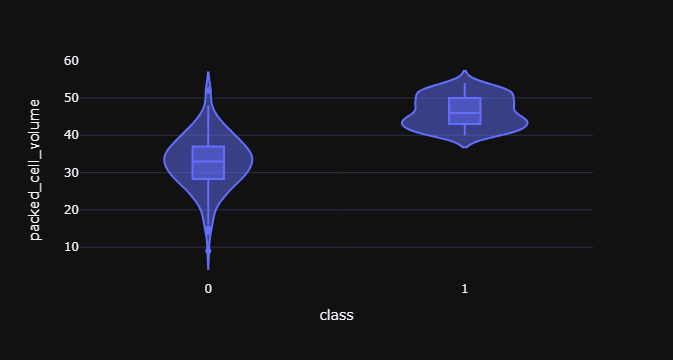

In [86]:
violin('packed_cell_volume')

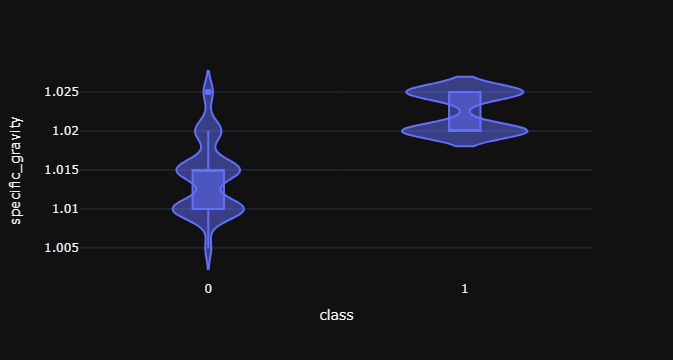

In [87]:
violin("specific_gravity")

<Axes: xlabel='age', ylabel='blood_pressure'>

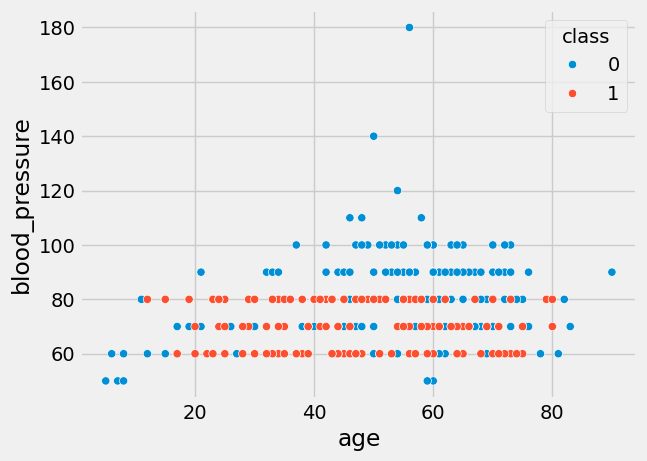

In [90]:
#bivarate
sns.scatterplot(x="age",y='blood_pressure',data=df,hue='class')
#most of the people has cronic diease having blood pressure above 100

In [97]:
diabeter_hypertension = pd.crosstab(df['diabetes_mellitus'],df['hypertension'])
diabeter_hypertension 


hypertension        no  yes
diabetes_mellitus          
no                 220   41
yes                 31  106

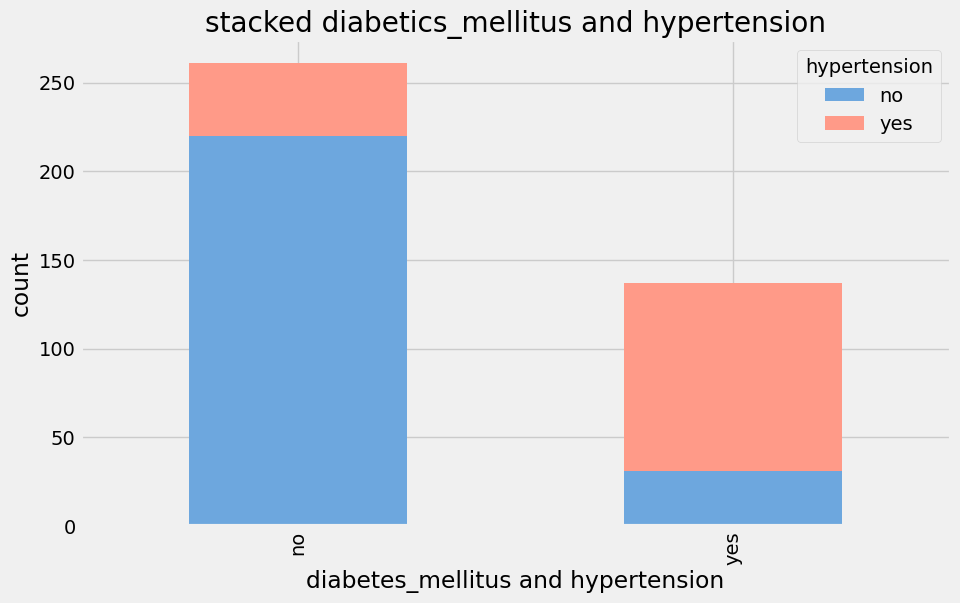

In [98]:
diabeter_hypertension.plot(kind='bar',stacked=True,color=['#6DA7DE',"#FF9A88"],figsize=(10,6))
plt.xlabel('diabetes_mellitus and hypertension')
plt.ylabel('count')
plt.legend(title='hypertension')
plt.title("stacked diabetics_mellitus and hypertension")
plt.show()
#stackedbar chart
#more people has hyptenssion has more diabetics

In [105]:
def scatter(col1,col2):
    fig=px.scatter(df,x=col1,y=col2,color="class",template='plotly_dark')
    return fig.show()

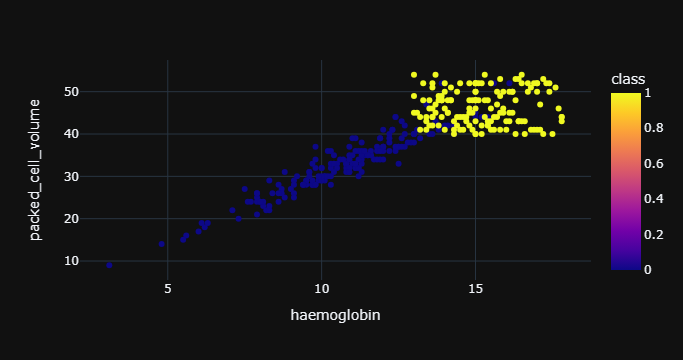

In [104]:
scatter('haemoglobin','packed_cell_volume')

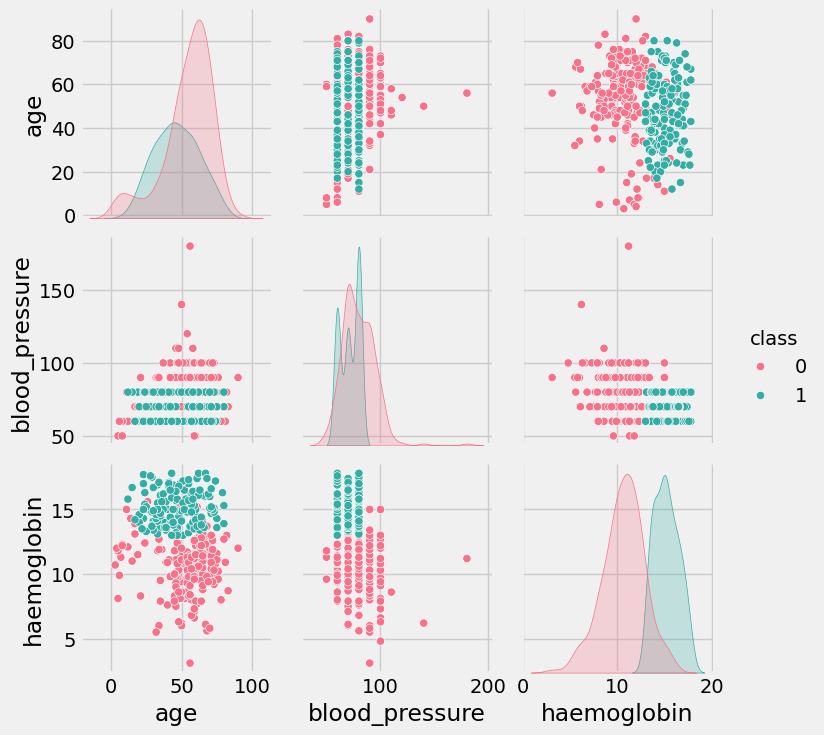

In [106]:
#multivariate analysis
selected_columns=['age','blood_pressure','haemoglobin','class']
sns.pairplot(df[selected_columns],hue='class',palette='husl')

In [109]:
#corelation matrix
df[selected_columns].corr()

age  blood_pressure  haemoglobin     class
age             1.000000        0.159480    -0.192928 -0.227268
blood_pressure  0.159480        1.000000    -0.306540 -0.294077
haemoglobin    -0.192928       -0.306540     1.000000  0.768919
class          -0.227268       -0.294077     0.768919  1.000000

<Axes: >

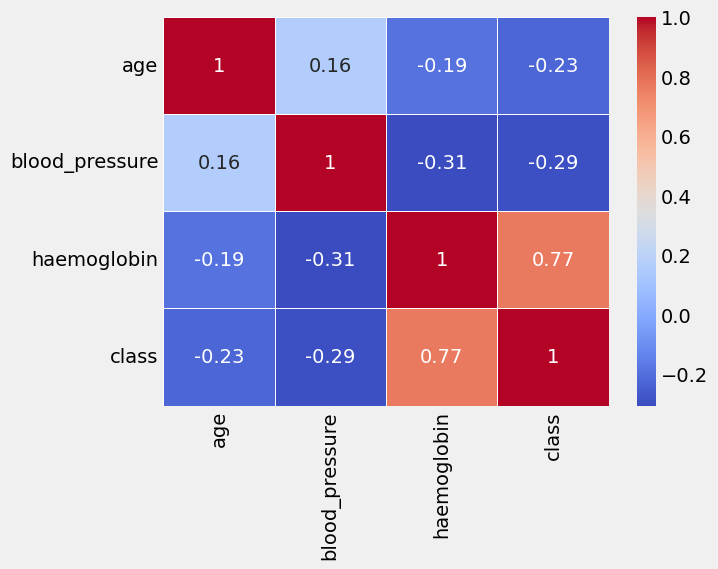

In [110]:
sns.heatmap(df[selected_columns].corr(),annot=True,cmap="coolwarm",linewidth=.5)

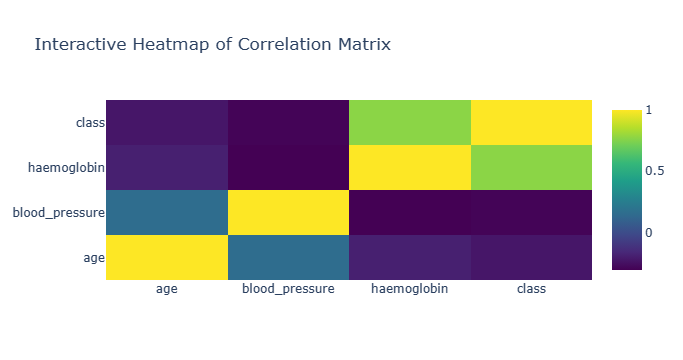

In [112]:
import plotly.graph_objects as go

heatmap_data = df[selected_columns].corr()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
                                x=heatmap_data.columns,
                                y=heatmap_data.index,
                                colorscale='Viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()

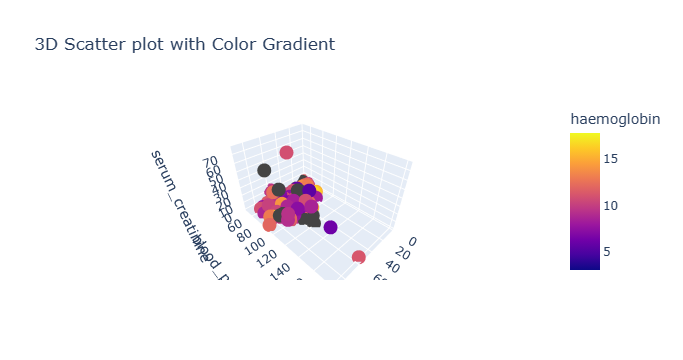

In [113]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()